In [1]:
import pandas as pd


file_path = 'C:\\Users\\cx\\data\\'

file_Case = file_path + "Case.csv"
file_PatientInfo = file_path + "PatientInfo.csv"
file_PatientRoute = file_path + "PatientRoute.csv"
file_Region = file_path + "Region.csv"
file_SearchTrend = file_path + "SearchTrend.csv"
file_SeoulFloating = file_path + "SeoulFloating.csv"
file_Time = file_path + "Time.csv"
file_TimeAge = file_path + "TimeAge.csv"
file_TimeGender = file_path + "TimeGender.csv"
file_TimeProvince = file_path + "TimeProvince.csv"
file_Weather = file_path + "Weather.csv"


In [2]:
pd_Case = pd.read_csv(file_Case)
pd_PatientInfo = pd.read_csv(file_PatientInfo)
pd_PatientRoute = pd.read_csv(file_PatientRoute)
pd_Region = pd.read_csv(file_Region)
pd_SearchTrend = pd.read_csv(file_SearchTrend)
pd_SeoulFloating = pd.read_csv(file_SeoulFloating)
pd_Time = pd.read_csv(file_Time)
pd_TimeAge = pd.read_csv(file_TimeAge)
pd_TimeGender = pd.read_csv(file_TimeGender)
pd_TimeProvince = pd.read_csv(file_TimeProvince)
pd_Weather = pd.read_csv(file_Weather)


First, I plan to compress the data in PatientRoute.csv, so  the data with the same patient_id can be merged together, and the elements in their other attributes (city date global_num latitude longitude province type) can be merged, in order to form the corresponding list to get the new compressed DataFrame. The patient_id in the columns will remain unchanged, and the other correspondence becomes: (route_city route_date route_global_num route_latitude route_longitude route_province route_type), the first five rows of compressed data are listed below:

In [3]:
patient_date = []
patient_global_num = []
patient_province = []
patient_city = []
patient_type = []
patient_latitude = []
patient_longitude = []
patient_id = []

route_num = len(pd_PatientRoute)
now_index = 0
for i in range(route_num):
    tmp_id = pd_PatientRoute['patient_id'][i]
    tmp_global_num = pd_PatientRoute['global_num'][i]
    tmp_date = pd_PatientRoute['date'][i]
    tmp_province = pd_PatientRoute['province'][i]
    tmp_city = pd_PatientRoute['city'][i]
    tmp_type = pd_PatientRoute['type'][i]
    tmp_latitude = pd_PatientRoute['latitude'][i]
    tmp_longitude = pd_PatientRoute['longitude'][i]
    if tmp_id not in patient_id:
        patient_id.append(tmp_id)
        patient_global_num.append([])
        patient_date.append([])
        patient_province.append([])
        patient_city.append([])
        patient_type.append([])
        patient_latitude.append([])
        patient_longitude.append([])
        
        patient_global_num[now_index].append(tmp_global_num)
        patient_date[now_index].append(tmp_date)
        patient_province[now_index].append(tmp_province)
        patient_city[now_index].append(tmp_city)
        patient_type[now_index].append(tmp_type)
        patient_latitude[now_index].append(tmp_latitude)
        patient_longitude[now_index].append(tmp_longitude)
        now_index += 1
    else:
        tmp_index = patient_id.index(tmp_id)
        patient_global_num[tmp_index].append(tmp_global_num)
        patient_date[tmp_index].append(tmp_date)
        patient_province[tmp_index].append(tmp_province)
        patient_city[tmp_index].append(tmp_city)
        patient_type[tmp_index].append(tmp_type)
        patient_latitude[tmp_index].append(tmp_latitude)
        patient_longitude[tmp_index].append(tmp_longitude)

pd_patient_ways = pd.DataFrame({'patient_id':patient_id,
                               'route_global_num':patient_global_num,
                               'route_date':patient_date,
                               'route_province':patient_province,
                               'route_city':patient_city,
                               'route_type':patient_type,
                               'route_latitude':patient_latitude,
                               'route_longitude':patient_longitude})
# print(len(pd_patient_ways))
pd_patient_ways.head()

,patient_id,route_city,route_date,route_global_num,route_latitude,route_longitude,route_province,route_type
0,1000000001,"[Gimpo-si, Jung-gu]","[2020-01-22, 2020-01-24]","[2.0, 2.0]","[37.6152464, 37.5672412]","[126.7156325, 127.00565890000001]","[Gyeonggi-do, Seoul]","[airport, hospital]"
1,1000000002,"[Seongbuk-gu, Seongbuk-gu, Seongdong-gu, Seong...","[2020-01-25, 2020-01-26, 2020-01-26, 2020-01-2...","[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ...","[37.5925601, 37.5918099, 37.563992299999995, 3...","[127.0170483, 127.01682190000001, 127.0295342,...","[Seoul, Seoul, Seoul, Seoul, Seoul, Seoul, Seo...","[etc, store, public_transportation, public_tra..."
2,1000000003,"[Jongno-gu, Jongno-gu]","[2020-01-26, 2020-01-26]","[6.0, 6.0]","[37.586288200000006, 37.572950299999995]","[126.99971570000001, 126.97935790000001]","[Seoul, Seoul]","[church, restaurant]"
3,1000000004,[Jungnang-gu],[2020-01-30],[7.0],[37.6127725],[127.0981666],[Seoul],[hospital]
4,1000000005,[Jungnang-gu],[2020-01-31],[9.0],[37.6127725],[127.0981666],[Seoul],[hospital]


Named the compressed new DataFrame as pd_patient_ways, and then merged two DataFrames according to patient_id through the pd.merge () function. After merging, the first five rows of data are listed as follows:

In [4]:
df_patient = pd.merge(pd_PatientInfo, pd_patient_ways, how='left',on='patient_id')

# patient_len = len(df_patient)
# for i in range(patient_len):
#     tmp_city = df_patient['city'][i]
#     tmp_date = df_patient['confirmed_date'][i]
#     tmp_global_num = df_patient['global_num'][i]
#     tmp_province = df_patient['province'][i]

# print(len(df_patient))
# patient_files = file_path + 'patient.csv'
# df_patient.to_csv(patient_files)
df_patient.head()

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,...,released_date,deceased_date,state,route_city,route_date,route_global_num,route_latitude,route_longitude,route_province,route_type
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,...,2020/2/5,NaN,released,"[Gimpo-si, Jung-gu]","[2020-01-22, 2020-01-24]","[2.0, 2.0]","[37.6152464, 37.5672412]","[126.7156325, 127.00565890000001]","[Gyeonggi-do, Seoul]","[airport, hospital]"
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,...,2020/3/2,NaN,released,"[Seongbuk-gu, Seongbuk-gu, Seongdong-gu, Seong...","[2020-01-25, 2020-01-26, 2020-01-26, 2020-01-2...","[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ...","[37.5925601, 37.5918099, 37.563992299999995, 3...","[127.0170483, 127.01682190000001, 127.0295342,...","[Seoul, Seoul, Seoul, Seoul, Seoul, Seoul, Seo...","[etc, store, public_transportation, public_tra..."
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,...,2020/2/19,NaN,released,"[Jongno-gu, Jongno-gu]","[2020-01-26, 2020-01-26]","[6.0, 6.0]","[37.586288200000006, 37.572950299999995]","[126.99971570000001, 126.97935790000001]","[Seoul, Seoul]","[church, restaurant]"
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,...,2020/2/15,NaN,released,[Jungnang-gu],[2020-01-30],[7.0],[37.6127725],[127.0981666],[Seoul],[hospital]
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,...,2020/2/24,NaN,released,[Jungnang-gu],[2020-01-31],[9.0],[37.6127725],[127.0981666],[Seoul],[hospital]


Based on the new DataFrame, we construct the draw_paient_route () function, which displays the patient 's action in the row of data by passing in the line number. The name of the point in the route is (city_type), which represents a certain place. The route taken by the patient in line 9 will used networkx to draw a directed graph. 

In [5]:
import networkx as nx
from collections import defaultdict
def draw_graphs(places,routes):
#     G = nx.Graph()
    G = nx.DiGraph() 
    for i in range(len(places)):
        G.add_node(places[i])
    for i in range(len(routes)):
        place1 = routes[i][0]
        place2 = routes[i][1]
        G.add_weighted_edges_from([(place1,place2,i+1)])
#         G.add_edge(place1,place2)
    nx.draw(G,with_labels=True, node_size=400, alpha=0.5 )
    
def draw_paient_route(patient_id):
    global df_patient
    
    route_province = df_patient['route_province'][patient_id]
#     route_global_num = df_patient['route_global_num'][patient_id]
    route_date = df_patient['route_date'][patient_id]
    route_city = df_patient['route_city'][patient_id]
    route_type = df_patient['route_type'][patient_id]
    
#     if pd.isnull(route_province):
#         print("The route information of patient_id %s is not recorded here"%patient_id)
#         return 0
    
    places_num = len(route_province)
    if places_num == 1:
        print("Patient_id %s has only been to %s province(%s city,type:%s)"%(patient_id,route_province[0],route_city[0],route_type[0]))
        return 0
    elif places_num > 1:
        tmp_place = route_city[0] + '_' + route_type[0]
        places = [tmp_place]
        routes = []
        for i in range(1,places_num):
            tmp_place = route_city[i] + '_' + route_type[i]
            if tmp_place not in places:
                places.append(tmp_place)
                tmp_route = []
                tmp_route.append(places[-2])
                tmp_route.append(places[-1])
                routes.append(tmp_route)
            else:
                ts = 1
                tmp_place1 = tmp_place + str(ts)
                while(tmp_place1 in places):
                    ts += 1
                    tmp_place1 = tmp_place + str(ts)
                places.append(tmp_place1)
                tmp_route = []
                tmp_route.append(places[-2])
                tmp_route.append(places[-1])
                routes.append(tmp_route)
#             else:
#                 index = places.index(tmp_place)
#                 tmp_route = []
#                 tmp_route.append(places[-1])
#                 tmp_route.append(places[index])
#                 routes.append(tmp_route)

        draw_graphs(places,routes)
    else:
        print("The route information of patient_id %s is not recorded here"%patient_id)
        return 0
    

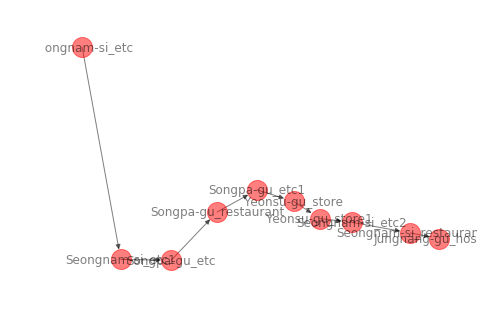

In [7]:
draw_index = 8
draw_paient_route(draw_index)

I find all the different categories in 'sex' and 'age' in the combined DataFrame, and output as follows, and then correspond to different numbers according to their categories, so that the data in 'sex' and 'age' are digitized. After that, show the first five rows of data in the new DataFrame

In [8]:

titles = df_patient.columns.values.tolist() 
# print(titles)
# print()

va_title = ['sex','age']

for i in range(len(titles)):
    if titles[i] not in va_title:
        continue
    print(titles[i],':',end='')
    print(list(set(df_patient[titles[i]])))
    print()

sex :[nan, 'female', 'male']

age :['20s', nan, '40s', '90s', '10s', '60s', '100s', '30s', '70s', '80s', '0s', '50s']



In [9]:
# def change_sex(df):
#     df_len = len(df)
#     for i in range(df_len):
#         tmp_sex = df['sex'][i]
#         if pd.isnull(tmp_sex):
#             df['sex'][i] = 0
#         elif tmp_sex == 'female':
#             df['sex'][i] = 1
#         elif tmp_sex == 'male':
#             df['sex'][i] = 2
#     return df

# def change_age(df):
#     df_len = len(df)
#     strs = 'age'
#     original = [ '0s', '10s', '20s','30s', '40s', '50s', '60s', '70s', '80s', '90s', '100s']
#     change = [ 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
#     for i in range(df_len):
#         tmps = df[strs][i]
#         if pd.isnull(tmps):
#             df[strs][i] = 0
#         else:
#             for j in range(len(original)):
#                 if df[strs][i] == original[j]:
#                     df[strs][i] = change[j]
#                     break
#     return df
new_df_patient = df_patient.copy()
new_df_patient['sex'].fillna(0,inplace=True)
new_df_patient['age'].fillna(-1,inplace=True)

def set_change(df,strs,original,change):
    for j in range(len(original)):
        index = df[df[strs] == original[j]].index.tolist()
        df[strs][index] = change[j]
    return df

original = [ '0s', '10s', '20s','30s', '40s', '50s', '60s', '70s', '80s', '90s', '100s']
change = [ 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
strs = 'age'
new_df_patient = set_change(new_df_patient,strs,original,change)

original = ['female', 'male']
change = [ 1, 2]
strs = 'sex'
new_df_patient = set_change(new_df_patient,strs,original,change)


new_df_patient.head()

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,...,released_date,deceased_date,state,route_city,route_date,route_global_num,route_latitude,route_longitude,route_province,route_type
0,1000000001,2.0,2,1964.0,5,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,...,2020/2/5,NaN,released,"[Gimpo-si, Jung-gu]","[2020-01-22, 2020-01-24]","[2.0, 2.0]","[37.6152464, 37.5672412]","[126.7156325, 127.00565890000001]","[Gyeonggi-do, Seoul]","[airport, hospital]"
1,1000000002,5.0,2,1987.0,3,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,...,2020/3/2,NaN,released,"[Seongbuk-gu, Seongbuk-gu, Seongdong-gu, Seong...","[2020-01-25, 2020-01-26, 2020-01-26, 2020-01-2...","[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ...","[37.5925601, 37.5918099, 37.563992299999995, 3...","[127.0170483, 127.01682190000001, 127.0295342,...","[Seoul, Seoul, Seoul, Seoul, Seoul, Seoul, Seo...","[etc, store, public_transportation, public_tra..."
2,1000000003,6.0,2,1964.0,5,Korea,Seoul,Jongno-gu,NaN,contact with patient,...,2020/2/19,NaN,released,"[Jongno-gu, Jongno-gu]","[2020-01-26, 2020-01-26]","[6.0, 6.0]","[37.586288200000006, 37.572950299999995]","[126.99971570000001, 126.97935790000001]","[Seoul, Seoul]","[church, restaurant]"
3,1000000004,7.0,2,1991.0,2,Korea,Seoul,Mapo-gu,NaN,overseas inflow,...,2020/2/15,NaN,released,[Jungnang-gu],[2020-01-30],[7.0],[37.6127725],[127.0981666],[Seoul],[hospital]
4,1000000005,9.0,1,1992.0,2,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,...,2020/2/24,NaN,released,[Jungnang-gu],[2020-01-31],[9.0],[37.6127725],[127.0981666],[Seoul],[hospital]


Based on the new generated DataFrame, I build the number of diagnosed patients on that day, the number of releases on that day,  and the cumulative number of diagnosed patients, cumulative releases,etc., and then draw a line chart as follows, and choose the date interval. It is the date of the first confirmed clinic and the date of the last confirmed clinic in the data.

In [10]:
import datetime
import numpy as np
import math
confirmed_date = list(df_patient['confirmed_date'])
# deceased_date = list(df_patient['deceased_date'])
# all_date = confirmed_date.copy()
# all_date.extend(deceased_date)
# print(all_date)
time_str1 = '%Y/%m/%d'
time_str2 = '%Y-%m-%d'

def date_style_change(date1):
    global time_str1,time_str2
    if '-' in date1:
        time_str = time_str2
    else:
        time_str = time_str1
        
    date2 = datetime.datetime.strptime(date1,time_str).date()
    date2 = date2.strftime(time_str1)
    return date2

for i in range(len(confirmed_date)):
    confirmed_date[i] = date_style_change(confirmed_date[i])

start_date = min(confirmed_date)
now_data = max(confirmed_date)

if '-' in start_date:
    time_str = time_str2
else:
    time_str = time_str1
dt_start_date = datetime.datetime.strptime(start_date,time_str).date()
if '-' in now_data:
    time_str = time_str2
else:
    time_str = time_str1
dt_now_data = datetime.datetime.strptime(now_data,time_str).date()

date_list = [x.strftime(time_str1) for x in list(pd.date_range(start=dt_start_date, end=dt_now_data))]

# print(date_list)
date_len = len(date_list)
confirmed_num = [0 for i in range(date_len)]
confirmed_id = [[] for i in range(date_len)]
release_num = [0 for i in range(date_len)]
release_id = [[] for i in range(date_len)]
decease_num = [0 for i in range(date_len)]
decease_id = [[] for i in range(date_len)]
now_confirmed_num = [0 for i in range(date_len)]
now_release_num = [0 for i in range(date_len)]
now_decease_num = [0 for i in range(date_len)]
acc_confirmed_num = [0 for i in range(date_len)]
patient_num = len(df_patient)
last_index = len(date_list)
for i in range(patient_num):
    tmp_state = df_patient['state'][i]
    tmp_id = i
#     tmp_id = df_patient['patient_id'][i]
    tmp_confirmed_date = df_patient['confirmed_date'][i]
    tmp_released_date = df_patient['released_date'][i]
    tmp_deceased_date = df_patient['deceased_date'][i]
    tmp_confirmed_date = date_style_change(tmp_confirmed_date)
    
    
    tmp_confirmed_index = date_list.index(tmp_confirmed_date)
    confirmed_num[tmp_confirmed_index] += 1
    confirmed_id[tmp_confirmed_index].append(tmp_id)
    if tmp_state == 'isolated':
        end_index = last_index
    elif tmp_state == 'released':
#         print(tmp_released_date)
#         if np.array(tmp_released_date) is np.nan:
        if pd.isnull(tmp_released_date):
            if pd.isnull(tmp_deceased_date):
                continue
            else:
                tmp_deceased_date = date_style_change(tmp_deceased_date)
                end_index = date_list.index(tmp_deceased_date)
                decease_num[end_index] += 1
                decease_id[end_index].append(tmp_id)
            continue
        tmp_released_date = date_style_change(tmp_released_date)
        end_index = date_list.index(tmp_released_date)
        release_num[end_index] += 1
        release_id[end_index].append(tmp_id)
    elif tmp_state == 'deceased':
        if pd.isnull(tmp_deceased_date):
            if pd.isnull(tmp_released_date):
                continue
            else:
                
                tmp_released_date = date_style_change(tmp_released_date)
                end_index = date_list.index(tmp_released_date)
                release_num[end_index] += 1
                release_id[end_index].append(tmp_id)
            continue
        tmp_deceased_date = date_style_change(tmp_deceased_date)
        end_index = date_list.index(tmp_deceased_date)
        decease_num[end_index] += 1
        decease_id[end_index].append(tmp_id)
    else:
        end_index = last_index
now_confirmed_num = confirmed_num.copy()
now_decease_num = decease_num.copy()
now_release_num = release_num.copy()
for i in range(1,date_len):
    confirmed_num[i] = confirmed_num[i] + confirmed_num[i-1]
    
    decease_num[i] = decease_num[i] + decease_num[i-1]
    release_num[i] = release_num[i] + release_num[i-1]
    acc_confirmed_num[i] = confirmed_num[i] - decease_num[i] - release_num[i]

# Existing diagnosis
# Cumulative diagnosis

df_existing_confirm = pd.DataFrame({'existing_confirm':now_confirmed_num},index=pd.date_range(start_date, periods=date_len)) 

df_today_patient = pd.DataFrame({'today_confirmed':now_confirmed_num,
                                'today_release':now_release_num,
                                'today_decease':now_decease_num},index=pd.date_range(start_date, periods=date_len)) 

df_cumulative_patient = pd.DataFrame({'cumulative_confirm':confirmed_num,
                               'cumulative_release':release_num,
                               'cumulative_decease':decease_num},index=pd.date_range(start_date, periods=date_len)) 

# df_date_patient.head(5)

# print(date_list)
# print(list(set(start_date)))

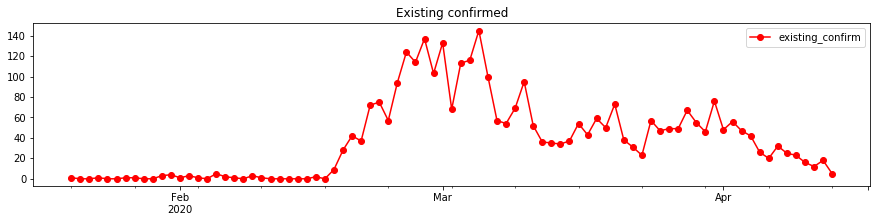

In [11]:
df_existing_confirm.plot(kind='line',marker='o',color='r',title='Existing confirmed',figsize=(15,3))

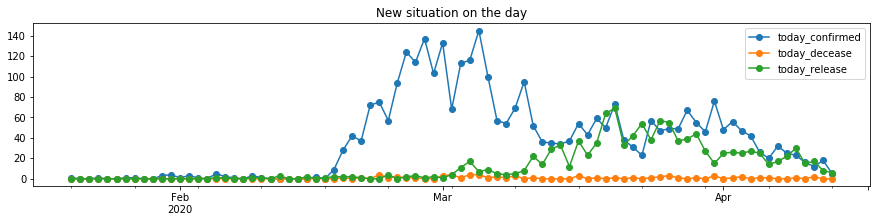

In [12]:
df_today_patient.plot(kind='line',marker='o',title='New situation on the day',figsize=(15,3))

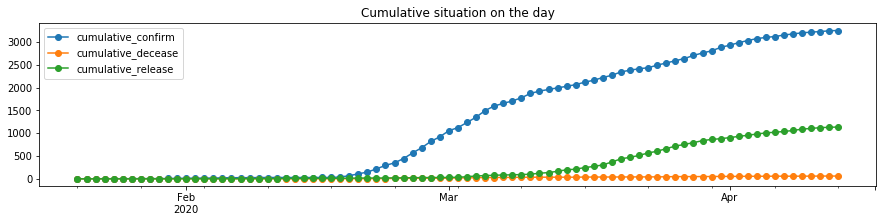

In [13]:
df_cumulative_patient.plot(kind='line',marker='o',title='Cumulative situation on the day',figsize=(15,3))

According to the cumulative diagnosis, I draw bar graphs comparing the number of diagnosed people of different genders and different ages.

In [14]:
confirmed_id
df_cumulative_patient = pd.DataFrame({'cumulative_confirm':confirmed_num,
                               'cumulative_release':release_num,
                               'cumulative_decease':decease_num},
                                     index=pd.date_range(start_date, periods=date_len)) 
# df_patient['sex'].finall('unknown',replace=True)
# df_patient['age'].finall('unknown',replace=True)
original_age = ['unknown', '0s', '10s', '20s','30s', '40s', '50s', '60s', '70s', '80s', '90s', '100s']
change_age = [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
strs_age = 'age'

original_sex = ['unknown', 'female', 'male']
change_sex = [ 0, 1, 2]
strs_sex = 'sex'

def get_sex_age_df(confirmed_id):
    confirmed_sex_num = [[0 for j in range(len(change_sex))] for i in range(date_len)]
    confirmed_age_num = [[0 for j in range(len(change_age))] for i in range(date_len)]
    for i in range(date_len):
        tmp = confirmed_id[i]
        for j in range(len(tmp)):
            tmp_index = tmp[j]
            tmp_sex = new_df_patient[strs_sex][tmp_index]
            tmp_age = new_df_patient[strs_age][tmp_index]
            index_sex = change_sex.index(tmp_sex)
            index_age = change_age.index(tmp_age)
            confirmed_sex_num[i][index_sex] += 1
            confirmed_age_num[i][index_age] += 1

    for i in range(1,date_len):
        for j in range(len(original_sex)):
            confirmed_sex_num[i][j] += confirmed_sex_num[i-1][j]
        for j in range(len(original_age)):
            confirmed_age_num[i][j] += confirmed_age_num[i-1][j]
    return confirmed_sex_num,confirmed_age_num
    
confirmed_sex_num,confirmed_age_num = get_sex_age_df(confirmed_id)

# df_confirmed_sex_patient = pd.DataFrame(data=confirmed_sex_num,
#                                         columns=original_sex,
#                                         index=pd.date_range(start_date, periods=date_len)) 
# df_confirmed_age_patient.head(50)

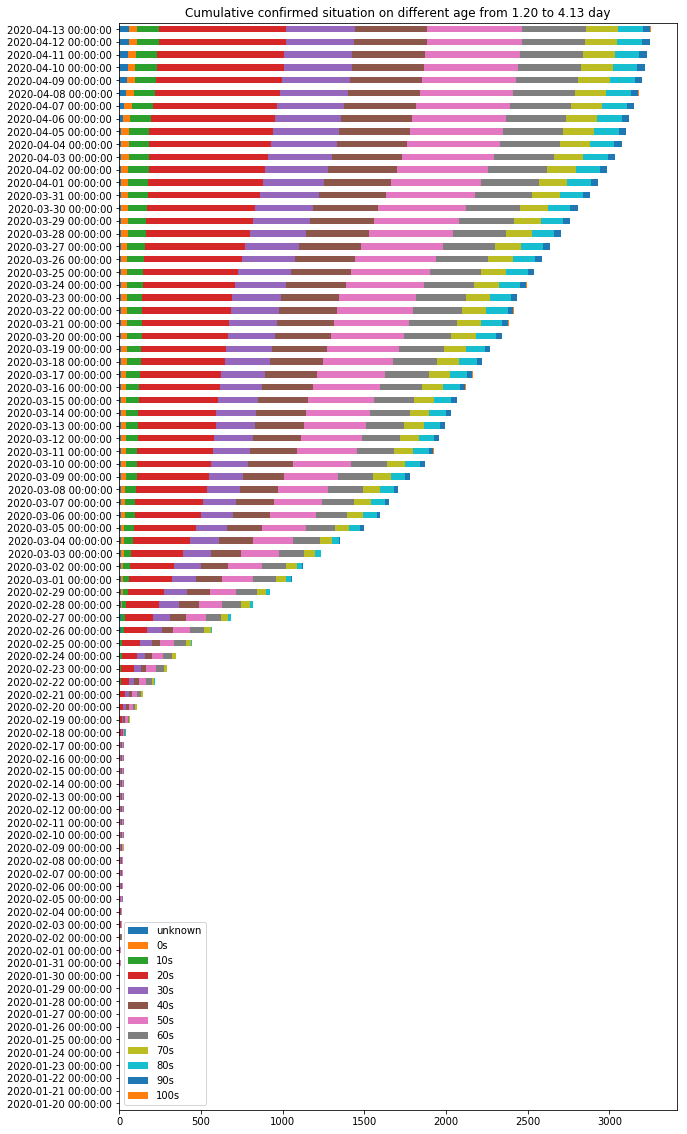

In [15]:
df_confirmed_age_patient = pd.DataFrame(data=confirmed_age_num,
                                        columns=original_age,
                                        index=pd.date_range(start_date, periods=date_len)) 

df_confirmed_age_patient.plot(kind='barh', stacked=True, title='Cumulative confirmed situation on different age from 1.20 to 4.13 day', figsize=(10,20))

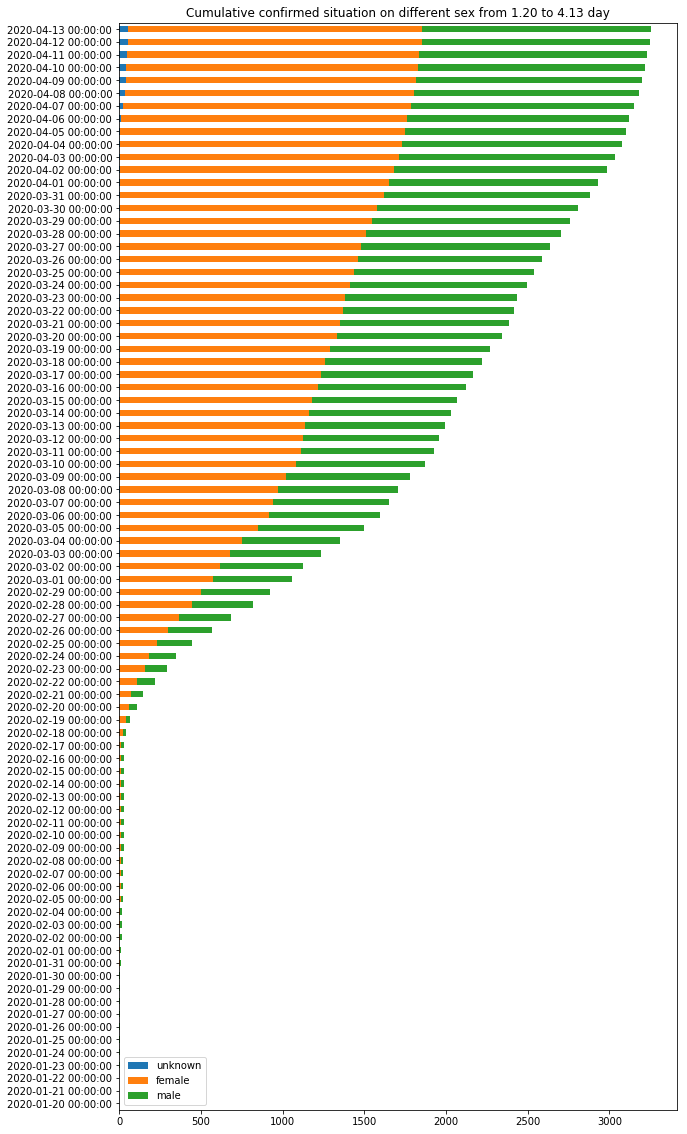

In [16]:
df_confirmed_sex_patient = pd.DataFrame(data=confirmed_sex_num,
                                        columns=original_sex,
                                        index=pd.date_range(start_date, periods=date_len)) 
df_confirmed_sex_patient.plot(kind='barh', stacked=True, title='Cumulative confirmed situation on different sex from 1.20 to 4.13 day',figsize=(10,20))